In [1]:
import json
import os
import pandas as pd
import numpy as np
import prettytable as pt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import dates
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")


###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                                                                     #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################


directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
datadirectory=directory+"/data/yielddata.csv"


yielddata = pd.read_csv(datadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 

mdirectory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
mdatadirectory=mdirectory+"/data/marketdata.csv"

marketdata = pd.read_csv(mdatadirectory)
marketdata = marketdata.replace(np.nan, '', regex=True) 


/opt/homebrew/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
leg1Definition={}
leg1Definition["type"]="Fixed"
leg1Definition["payOrReceive"]="Receive"
leg1Definition["currency"]="USD"
leg1Definition["notional"]=1000000
leg1Definition["coupon"]=0.00971619
leg1Definition["spread"]= 0.0
leg1Definition["frequency"]="Semiannual"
leg1Definition["dayCounter"]="Thirty360"
leg1Definition["calendar"]="UnitedStates"
leg1Definition["maturityDateConvention"]="ModifiedFollowing"
leg1Definition["businessDayConvention"]="ModifiedFollowing"
leg1Definition["dateGeneration"]="Backward"
leg1Definition["endOfMonth"]=True
leg1Definition["initialNominal"]=0
leg1Definition["resetTable"]=False
leg1Definition["runningCapitalExchange"]=False
leg1Definition["fixingDate"]=[]
leg1Definition["fixingRate"]=[]
leg1Definition

{'type': 'Fixed',
 'payOrReceive': 'Receive',
 'currency': 'USD',
 'notional': 1000000,
 'coupon': 0.00971619,
 'spread': 0.0,
 'frequency': 'Semiannual',
 'dayCounter': 'Thirty360',
 'calendar': 'UnitedStates',
 'maturityDateConvention': 'ModifiedFollowing',
 'businessDayConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True,
 'initialNominal': 0,
 'resetTable': False,
 'runningCapitalExchange': False,
 'fixingDate': [],
 'fixingRate': []}

In [3]:
leg2Definition={}
leg2Definition["type"]="Floating"
leg2Definition["payOrReceive"]="Pay"
leg2Definition["currency"]="USD"
leg2Definition["notional"]=838447.865
leg2Definition["coupon"]=0.0
leg2Definition["spread"]= 0.0
leg2Definition["frequency"]="Quarterly"
leg2Definition["dayCounter"]="Actual360"
leg2Definition["calendar"]="TARGET"
leg2Definition["maturityDateConvention"]="ModifiedFollowing"
leg2Definition["businessDayConvention"]="ModifiedFollowing"
leg2Definition["dateGeneration"]="Backward"
leg2Definition["endOfMonth"]=True
leg2Definition["initialNominal"]=0
leg2Definition["resetTable"]=False
leg2Definition["runningCapitalExchange"]=False
leg2Definition["fixingDate"]=["2021-01-28"]
leg2Definition["fixingRate"]=[-0.00477]
leg2Definition

{'type': 'Floating',
 'payOrReceive': 'Pay',
 'currency': 'USD',
 'notional': 838447.865,
 'coupon': 0.0,
 'spread': 0.0,
 'frequency': 'Quarterly',
 'dayCounter': 'Actual360',
 'calendar': 'TARGET',
 'maturityDateConvention': 'ModifiedFollowing',
 'businessDayConvention': 'ModifiedFollowing',
 'dateGeneration': 'Backward',
 'endOfMonth': True,
 'initialNominal': 0,
 'resetTable': False,
 'runningCapitalExchange': False,
 'fixingDate': ['2021-01-28'],
 'fixingRate': [-0.00477]}

In [4]:
instruments={}
depo={}
irs={}

depo["businessDayConvention"]="Following"     # if it is null, default value is used
depo["dayCounter"]="Actual360"                # if it is null, default value is used

irs["businessDayConvention"]="Following"      # if it is null, default value is used 
irs["dayCounter"]="Actual360"                 # if it is null, default value is used 
irs["frequency"]="Semiannual"               

instruments["DEPO"]=depo
instruments["IRS"]=irs

instruments

{'DEPO': {'businessDayConvention': 'Following', 'dayCounter': 'Actual360'},
 'IRS': {'businessDayConvention': 'Following',
  'dayCounter': 'Actual360',
  'frequency': 'Semiannual'}}

In [5]:
leg1yieldcurveconfig={
      "name": "USDZCS",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "TRY",
      "calendar": "Turkey",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments": instruments
    }
leg1yieldcurveconfig

{'name': 'USDZCS',
 'settlementDays': 2,
 'intpMethod': 'LINEAR',
 'currency': 'TRY',
 'calendar': 'Turkey',
 'dayCounter': 'Actual360',
 'period': '6M',
 'instruments': {'DEPO': {'businessDayConvention': 'Following',
   'dayCounter': 'Actual360'},
  'IRS': {'businessDayConvention': 'Following',
   'dayCounter': 'Actual360',
   'frequency': 'Semiannual'}}}

In [6]:
 leg2yieldcurveconfig= {
      "name": "EURZCS",
      "settlementDays": 2,
      "intpMethod": "LINEAR",
      "currency": "USD",
      "calendar": "UnitedStates",
      "dayCounter": "Actual360",
      "period": "6M",
      "instruments":instruments
    }

In [7]:
riskdata = {
  "id": "PORTFOLIO1",
  "name": "PORTFOLIO 1",
  "method": "VaR",
  "forRisk": True,
  "valuationDate": "2021-01-28",
  "valuationCurrency": "EUR",
  "riskMethod": "DELTANORMAL",
  "horizon": 252,
  "confidenceInterval": 0.99,
  "returnType": None,
  "trend": False,
  "calendar": "Turkey",
  "timeBucket": ["0D","1D","1W","2W","3W","1M","2M","3M","6M","9M","1Y","2Y","3Y","4Y",
                "5Y","6Y","7Y","8Y","9Y","10Y","12Y","15Y","20Y","25Y","30Y","40Y","50Y"],
  "fillNa": "BACKWARD",
  "maxFillNaDays": 5,
  "tasks": [
            {
      "trade_id": "CCSWAP1000",
      "calculation_type": "cc_swap",
      "settlementDate": "2021-03-12",
      "maturityDate": "2026-03-12",
      "startDate": "2021-03-12",
      "spotPrice": 1.2121,
      "leg1": leg1Definition,
      "leg2": leg2Definition,
      "leg1DiscountCurve": "USDZCS",
      "leg2DiscountCurve": "EURZCS",
      "leg2ForecastCurve": "USDZCS",

    }
  ],
  "curves": [leg1yieldcurveconfig,leg2yieldcurveconfig],
  "yieldData": yielddata.to_dict('r'),
  "marketData":marketdata.to_dict('r'),
}

In [8]:
try:
    res = api.createTask(CalculationType.PORTFOLIO, riskdata, True)
    if(res["result"]):
      result=json.loads(res["result"])
    else:
      print(res["result"])
except RhoovaError as e:
    e.printPretty()

In [9]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['VAR', result.get('VaR')])
npvTable.add_row(['VAR/PV (%)', result.get('var/pv')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)


+------------+-------------+
| Parameters |       Value |
+------------+-------------+
|         PV | 151120.7583 |
|        VAR |   6972.1742 |
| VAR/PV (%) |      4.6136 |
+------------+-------------+


In [10]:
cashflowForVarTemp=result.get("cashflowForVar")
cashflowForVar1=pd.DataFrame(cashflowForVarTemp.get("USDZCS"))
cashflowForVar2=pd.DataFrame(cashflowForVarTemp.get("EURZCS"))
cashflowForVar=pd.concat([cashflowForVar1,cashflowForVar2])

In [11]:
cashflowForVar1["splitPv"].sum()

844492.8384781773

In [12]:
cashflowForVar2["splitPv"].sum()

-691807.1374091338

In [13]:
ccs=cashflowForVar[['fixingDate', 'accrualStart', 'accrualEnd', 'notional', 'currency',
       'leg', 'payOrReceive', 'instrument', 'rate', 'zeroRate','spread','termToMatByDay', 
        'termToMatByYear', 'cashflow', 'discountFactor','cashflowPv']]
ccs

fixingDate accrualStart  accrualEnd       notional currency       leg  \
0   2021-01-28   2021-03-12  2021-09-13  825014.437753      USD     Fixed   
1   2021-07-30   2021-09-13  2022-03-14  825014.437753      USD     Fixed   
2   2022-01-28   2022-03-14  2022-09-12  825014.437753      USD     Fixed   
3   2022-07-29   2022-09-12  2023-03-13  825014.437753      USD     Fixed   
4   2023-01-27   2023-03-13  2023-09-12  825014.437753      USD     Fixed   
5   2023-07-31   2023-09-12  2024-03-12  825014.437753      USD     Fixed   
6   2024-01-29   2024-03-12  2024-09-12  825014.437753      USD     Fixed   
7   2024-07-31   2024-09-12  2025-03-12  825014.437753      USD     Fixed   
8   2025-01-28   2025-03-12  2025-09-12  825014.437753      USD     Fixed   
9   2025-07-31   2025-09-12  2026-03-12  825014.437753      USD     Fixed   
10  2026-01-28   2026-03-12  2026-03-12  825014.437753      USD     Fixed   
0   2021-01-28   2021-03-12  2021-06-14  691731.593928      USD  Floating   

   payOrReceive           instrument      rate  zeroRate  spread  \
0       Receive  Cross Currency Swap  0.009716  0.002490       0   
1       Receive  Cross Currency Swap  0.009716  0.003011       0   
2       Receive  Cross Currency Swap  0.009716  0.002458       0   
3       Receive  Cross Currency Swap  0.009716  0.002080       0   
4       Receive  Cross Currency Swap  0.009716  0.002398       0   
5       Receive  Cross Currency Swap  0.009716  0.002770       0   
6       Receive  Cross Currency Swap  0.009716  0.003373       0   
7       Receive  Cross Currency Swap  0.009716  0.003968       0   
8       Receive  Cross Currency Swap  0.009716  0.004620       0   
9       Receive  Cross Currency Swap  0.009716  0.005267       0   
10      Receive  Cross Currency Swap  0.009716  0.005267       0   
0           Pay  Cross Currency Swap -0.004770  0.002188       0   

    termToMatByDay  termToMatByYear       cashflow  discountFactor  \
0              181         0.502778    4030.265173        0.998466   
1              362         1.005556    4030.265173        0.996635   
2              540         1.500000    3963.465198        0.996042   
3              721         2.002778    4030.265173        0.995607   
4              900         2.500000    3985.731857        0.993753   
5             1080         3.000000    4007.998515        0.991413   
6             1260         3.500000    4007.998515        0.987886   
7             1440         4.000000    4007.998515        0.983809   
8             1620         4.500000    4007.998515        0.978911   
9             1800         5.000000    4007.998515        0.973424   
10            1800         5.000000  825014.437753        0.973424   
0               94         0.261111 -692190.464434        0.999192   

       cashflowPv  
0     4024.081954  
1     4016.703212  
2     3947.776545  
3     4012.559752  
4     3960.831778  
5     3973.580085  
6     3959.444709  
7     3943.105723  
8     3923.475637  
9     3901.481574  
10  803088.777451  
0  -691631.060127

In [14]:
cashflowForVar[['binLTimeToMatByDay', 'binRTimeToMatByDay', 'binL','binR', 'stDevL', 'stDevR', 'correl',
                'vertixL', 'vertixR','splitFactor', 'yieldsL', 'yieldsR', 'yields','stdev', 'duration',
                'cashflows0', 'cashflowsL', 'cashflowsR', 'presentValue', 'splitPv','splitDuration']]

binLTimeToMatByDay  binRTimeToMatByDay binL binR    stDevL    stDevR  \
0                  181                 181   6M   6M  0.034505  0.034505   
1                  273                 365   9M   1Y  0.029362  0.029077   
2                  365                 732   1Y   2Y  0.029077  0.051946   
3                  365                 732   1Y   2Y  0.029077  0.051946   
4                  732                1096   2Y   3Y  0.051946  0.057739   
5                  732                1096   2Y   3Y  0.051946  0.057739   
6                 1096                1461   3Y   4Y  0.057739  0.065762   
7                 1096                1461   3Y   4Y  0.057739  0.065762   
8                 1461                1826   4Y   5Y  0.065762  0.062450   
9                 1461                1826   4Y   5Y  0.065762  0.062450   
10                1461                1826   4Y   5Y  0.065762  0.062450   
0                   90                 181   3M   6M  0.045918  0.034564   

      correl   vertixL   vertixR  splitFactor  ...   yieldsR    yields  \
0   1.000000  USDZCS6M  USDZCS6M     0.500000  ...  0.002275  0.002275   
1   0.931134  USDZCS9M  USDZCS1Y     0.005323  ...  0.003115  0.003101   
2   0.201254  USDZCS1Y  USDZCS2Y     0.276564  ...  0.001991  0.002579   
3   0.201254  USDZCS1Y  USDZCS2Y     0.014909  ...  0.001991  0.002025   
4   0.881757  USDZCS2Y  USDZCS3Y     0.304135  ...  0.002607  0.002275   
5   0.881757  USDZCS2Y  USDZCS3Y     0.021537  ...  0.002607  0.002580   
6   0.907809  USDZCS3Y  USDZCS4Y     0.384230  ...  0.003789  0.003138   
7   0.907809  USDZCS3Y  USDZCS4Y     0.035000  ...  0.003789  0.003721   
8   0.940251  USDZCS4Y  USDZCS5Y     0.614673  ...  0.005053  0.004340   
9   0.940251  USDZCS4Y  USDZCS5Y     0.177613  ...  0.005053  0.004963   
10  0.940251  USDZCS4Y  USDZCS5Y     0.177613  ...  0.005053  0.004963   
0   0.605008  EURZCS3M  EURZCS6M     0.640775  ...  0.002275  0.002121   

       stdev      duration     cashflows0     cashflowsL     cashflowsR  \
0   0.034505 -2.024012e+03       0.000000    2015.132587    2015.132587   
1   0.029086 -4.040037e+03      25.874530      28.416062    3976.021445   
2   0.039982 -5.922243e+03     219.882042    1620.553679    2121.383495   
3   0.051261 -8.039062e+03      -9.619106     118.586417    3921.161146   
4   0.054620 -9.907811e+03     210.422660    1492.029122    2284.729824   
5   0.057484 -1.193129e+04      12.240928     127.232174    3868.692813   
6   0.061344 -1.387476e+04     109.190630    1766.644374    2134.959358   
7   0.065301 -1.579513e+04      16.361431     183.200364    3808.870552   
8   0.064320 -1.768719e+04     -87.670097    2716.744883    1377.809362   
9   0.062686 -1.954883e+04    -112.442493     867.643034    3250.108299   
10  0.062686 -4.023969e+06  -23145.387811  178597.379022  669008.798450   
0   0.045418  1.806385e+05 -105546.810437 -458151.496192 -128501.328545   

     presentValue        splitPv  splitDuration  
0     4025.658537    4025.633101  -2.035181e+03  
1     4017.716255    4017.716255  -4.040037e+03  
2     3948.161922    3948.161922  -5.922243e+03  
3     4013.956056    4013.956056  -8.039062e+03  
4     3963.124480    3963.124480  -9.907811e+03  
5     3977.096820    3977.096820  -1.193129e+04  
6     3964.217115    3964.217115  -1.387476e+04  
7     3948.783304    3948.783304  -1.579513e+04  
8     3930.487442    3930.487442  -1.768719e+04  
9     3909.765206    3909.765206  -1.954883e+04  
10  804793.896778  804793.896778  -4.023969e+06  
0  -691807.137409 -691807.137409   1.806385e+05  

[12 rows x 21 columns]

In [15]:
mappedcf=cashflowForVar[['termToMatByDay','cashflow',"binLTimeToMatByDay","binRTimeToMatByDay",'cashflows0', 'cashflowsL', 'cashflowsR', 'presentValue', 'splitPv',"duration",'splitDuration']]
mappedcf

termToMatByDay       cashflow  binLTimeToMatByDay  binRTimeToMatByDay  \
0              181    4030.265173                 181                 181   
1              362    4030.265173                 273                 365   
2              540    3963.465198                 365                 732   
3              721    4030.265173                 365                 732   
4              900    3985.731857                 732                1096   
5             1080    4007.998515                 732                1096   
6             1260    4007.998515                1096                1461   
7             1440    4007.998515                1096                1461   
8             1620    4007.998515                1461                1826   
9             1800    4007.998515                1461                1826   
10            1800  825014.437753                1461                1826   
0               94 -692190.464434                  90                 181   

       cashflows0     cashflowsL     cashflowsR   presentValue        splitPv  \
0        0.000000    2015.132587    2015.132587    4025.658537    4025.633101   
1       25.874530      28.416062    3976.021445    4017.716255    4017.716255   
2      219.882042    1620.553679    2121.383495    3948.161922    3948.161922   
3       -9.619106     118.586417    3921.161146    4013.956056    4013.956056   
4      210.422660    1492.029122    2284.729824    3963.124480    3963.124480   
5       12.240928     127.232174    3868.692813    3977.096820    3977.096820   
6      109.190630    1766.644374    2134.959358    3964.217115    3964.217115   
7       16.361431     183.200364    3808.870552    3948.783304    3948.783304   
8      -87.670097    2716.744883    1377.809362    3930.487442    3930.487442   
9     -112.442493     867.643034    3250.108299    3909.765206    3909.765206   
10  -23145.387811  178597.379022  669008.798450  804793.896778  804793.896778   
0  -105546.810437 -458151.496192 -128501.328545 -691807.137409 -691807.137409   

        duration  splitDuration  
0  -2.024012e+03  -2.035181e+03  
1  -4.040037e+03  -4.040037e+03  
2  -5.922243e+03  -5.922243e+03  
3  -8.039062e+03  -8.039062e+03  
4  -9.907811e+03  -9.907811e+03  
5  -1.193129e+04  -1.193129e+04  
6  -1.387476e+04  -1.387476e+04  
7  -1.579513e+04  -1.579513e+04  
8  -1.768719e+04  -1.768719e+04  
9  -1.954883e+04  -1.954883e+04  
10 -4.023969e+06  -4.023969e+06  
0   1.806385e+05   1.806385e+05

In [16]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['Split PV', cashflowForVar["splitPv"].sum()])
npvTable.add_row(['Errror', 100*(result.get('pv')-cashflowForVar["splitPv"].sum())/result.get('pv')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)
print("PV is preserved")

+------------+-------------+
| Parameters |       Value |
+------------+-------------+
|         PV | 151120.7583 |
|   Split PV | 152685.7011 |
|     Errror |     -1.0356 |
+------------+-------------+
PV is preserved


In [17]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['Duration', cashflowForVar["duration"].sum()])
npvTable.add_row(['Split Duration', cashflowForVar["splitDuration"].sum()])
npvTable.add_row(['Errror', 100*(cashflowForVar["duration"].sum()-cashflowForVar["splitDuration"].sum())/cashflowForVar["duration"].sum()])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)
print("Duration is preserved")

+----------------+---------------+
|     Parameters |         Value |
+----------------+---------------+
|       Duration | -3952101.3213 |
| Split Duration | -3952112.4908 |
|         Errror |       -0.0003 |
+----------------+---------------+
Duration is preserved


In [18]:
original_cf=pd.DataFrame(cashflowForVar['cashflow'].values,index=cashflowForVar['termToMatByDay'].tolist()).reset_index()
original_cf.columns=["bin","cashflows"]
original_cf=original_cf.groupby('bin').sum()
original_cf=original_cf.reset_index()


In [19]:
leftcf=cashflowForVar[["binLTimeToMatByDay","cashflowsL"]]
leftcf.columns=["bin","cashflows"]
rightcf=cashflowForVar[["binRTimeToMatByDay","cashflowsR"]]
rightcf.columns=["bin","cashflows"]
mappedcf=pd.concat([leftcf,rightcf])
mappedcf=mappedcf.groupby('bin').sum()
mappedcf=mappedcf.reset_index()


In [20]:
mappedcf0=cashflowForVar["cashflows0"].sum()
mappedcf["Cashflows"]="mapped cashflows"
original_cf["Cashflows"]="original cashflows"
cf=pd.concat([original_cf,mappedcf])
cf.loc[len(cf.index)] = [0,mappedcf0,"mapped cashflows0"] 
cf

bin      cashflows           Cashflows
0     94 -692190.464434  original cashflows
1    181    4030.265173  original cashflows
2    362    4030.265173  original cashflows
3    540    3963.465198  original cashflows
4    721    4030.265173  original cashflows
5    900    3985.731857  original cashflows
6   1080    4007.998515  original cashflows
7   1260    4007.998515  original cashflows
8   1440    4007.998515  original cashflows
9   1620    4007.998515  original cashflows
10  1800  829022.436268  original cashflows
0     90 -458151.496192    mapped cashflows
1    181 -124471.063371    mapped cashflows
2    273      28.416062    mapped cashflows
3    365    5715.161540    mapped cashflows
4    732    7661.805937    mapped cashflows
5   1096    8103.267374    mapped cashflows
6   1461  188125.596850    mapped cashflows
7   1826  673636.716111    mapped cashflows
19     0 -128307.957722   mapped cashflows0

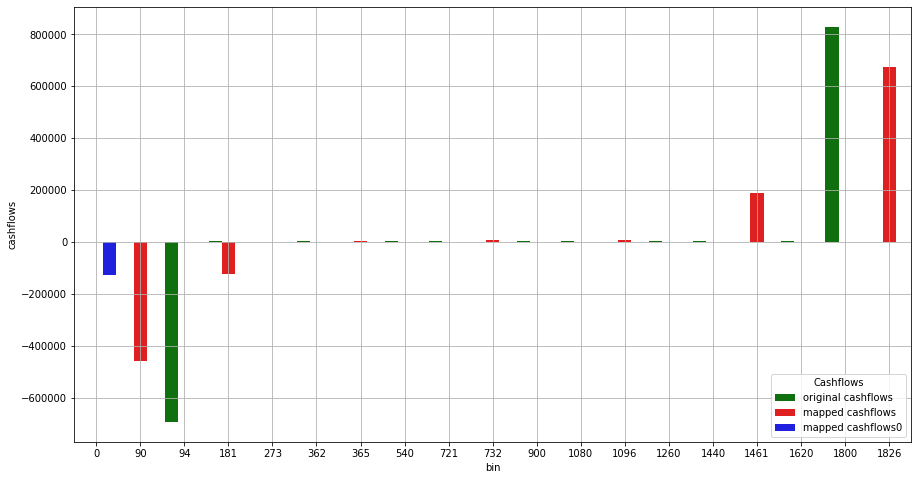

In [21]:
plt.figure(figsize=(15,8))
ax=sns.barplot(x="bin",y="cashflows",data=cf,hue="Cashflows",width=0.9,palette=["green", "red","blue"])
ax.grid()

In [22]:
portfoliocorr=result.get("riskFactorsCorr")
pd.DataFrame(portfoliocorr)

EURZCS0D  EURZCS1D  EURZCS1W  EURZCS2W  EURZCS3W  EURZCS1M  \
EURZCS0D   1.000000  1.000000  1.000000  1.000000  1.000000  0.998435   
EURZCS1D   1.000000  1.000000  1.000000  1.000000  1.000000  0.998435   
EURZCS1W   1.000000  1.000000  1.000000  1.000000  1.000000  0.998435   
EURZCS2W   1.000000  1.000000  1.000000  1.000000  1.000000  0.998435   
EURZCS3W   1.000000  1.000000  1.000000  1.000000  1.000000  0.998435   
EURZCS1M   0.998435  0.998435  0.998435  0.998435  0.998435  1.000000   
EURZCS2M   0.691095  0.691095  0.691095  0.691095  0.691095  0.690902   
EURZCS3M   0.567456  0.567456  0.567456  0.567456  0.567456  0.568807   
EURZCS6M   0.502527  0.502527  0.502527  0.502527  0.502527  0.498597   
EURZCS9M   0.543342  0.543342  0.543342  0.543342  0.543342  0.539821   
EURZCS1Y   0.508423  0.508423  0.508423  0.508423  0.508423  0.505052   
EURZCS2Y   0.330170  0.330170  0.330170  0.330170  0.330170  0.328999   
EURZCS3Y   0.161717  0.161717  0.161717  0.161717  0.161717  0.160296   
EURZCS4Y   0.237976  0.237976  0.237976  0.237976  0.237976  0.232237   
EURZCS5Y   0.240086  0.240086  0.240086  0.240086  0.240086  0.234650   
EURZCS6Y   0.186411  0.186411  0.186411  0.186411  0.186411  0.177952   
EURZCS7Y   0.195729  0.195729  0.195729  0.195729  0.195729  0.188606   
EURZCS8Y   0.197105  0.197105  0.197105  0.197105  0.197105  0.189978   
EURZCS9Y   0.205707  0.205707  0.205707  0.205707  0.205707  0.198970   
EURZCS10Y  0.255981  0.255981  0.255981  0.255981  0.255981  0.249971   
EURZCS12Y  0.262160  0.262160  0.262160  0.262160  0.262160  0.251035   
EURZCS15Y  0.239681  0.239681  0.239681  0.239681  0.239681  0.227661   
EURZCS20Y  0.246889  0.246889  0.246889  0.246889  0.246889  0.236760   
EURZCS25Y  0.235009  0.235009  0.235009  0.235009  0.235009  0.228341   
EURZCS30Y  0.291063  0.291063  0.291063  0.291063  0.291063  0.283353   
EURZCS40Y  0.267684  0.267684  0.267684  0.267684  0.267684  0.261264   
EURZCS50Y  0.234520  0.234520  0.234520  0.234520  0.234520  0.229270   
USDEUR    -0.015447 -0.015447 -0.015447 -0.015447 -0.015447 -0.008771   
USDZCS0D   0.989645  0.989645  0.989645  0.989645  0.989645  0.988161   
USDZCS1D   0.989645  0.989645  0.989645  0.989645  0.989645  0.988161   
USDZCS1W   0.989645  0.989645  0.989645  0.989645  0.989645  0.988161   
USDZCS2W   0.989645  0.989645  0.989645  0.989645  0.989645  0.988161   
USDZCS3W   0.989645  0.989645  0.989645  0.989645  0.989645  0.988161   
USDZCS1M   0.989645  0.989645  0.989645  0.989645  0.989645  0.988161   
USDZCS2M   0.686974  0.686974  0.686974  0.686974  0.686974  0.686703   
USDZCS3M   0.562448  0.562448  0.562448  0.562448  0.562448  0.563836   
USDZCS6M   0.501911  0.501911  0.501911  0.501911  0.501911  0.497985   
USDZCS9M   0.543992  0.543992  0.543992  0.543992  0.543992  0.540512   
USDZCS1Y   0.507382  0.507382  0.507382  0.507382  0.507382  0.504177   
USDZCS2Y   0.327963  0.327963  0.327963  0.327963  0.327963  0.326812   
USDZCS3Y   0.156996  0.156996  0.156996  0.156996  0.156996  0.155609   
USDZCS4Y   0.234569  0.234569  0.234569  0.234569  0.234569  0.228823   
USDZCS5Y   0.238927  0.238927  0.238927  0.238927  0.238927  0.233527   
USDZCS6Y   0.184804  0.184804  0.184804  0.184804  0.184804  0.176350   
USDZCS7Y   0.193871  0.193871  0.193871  0.193871  0.193871  0.186750   
USDZCS8Y   0.196220  0.196220  0.196220  0.196220  0.196220  0.189100   
USDZCS9Y   0.205020  0.205020  0.205020  0.205020  0.205020  0.198282   
USDZCS10Y  0.254870  0.254870  0.254870  0.254870  0.254870  0.248866   
USDZCS12Y  0.261976  0.261976  0.261976  0.261976  0.261976  0.250849   
USDZCS15Y  0.238582  0.238582  0.238582  0.238582  0.238582  0.226571   
USDZCS20Y  0.246670  0.246670  0.246670  0.246670  0.246670  0.236543   
USDZCS25Y  0.233864  0.233864  0.233864  0.233864  0.233864  0.227205   
USDZCS30Y  0.290366  0.290366  0.290366  0.290366  0.290366  0.282661   
USDZCS40Y  0.267706  0.267706  0.267706  0.267706  0.267706  0.261286

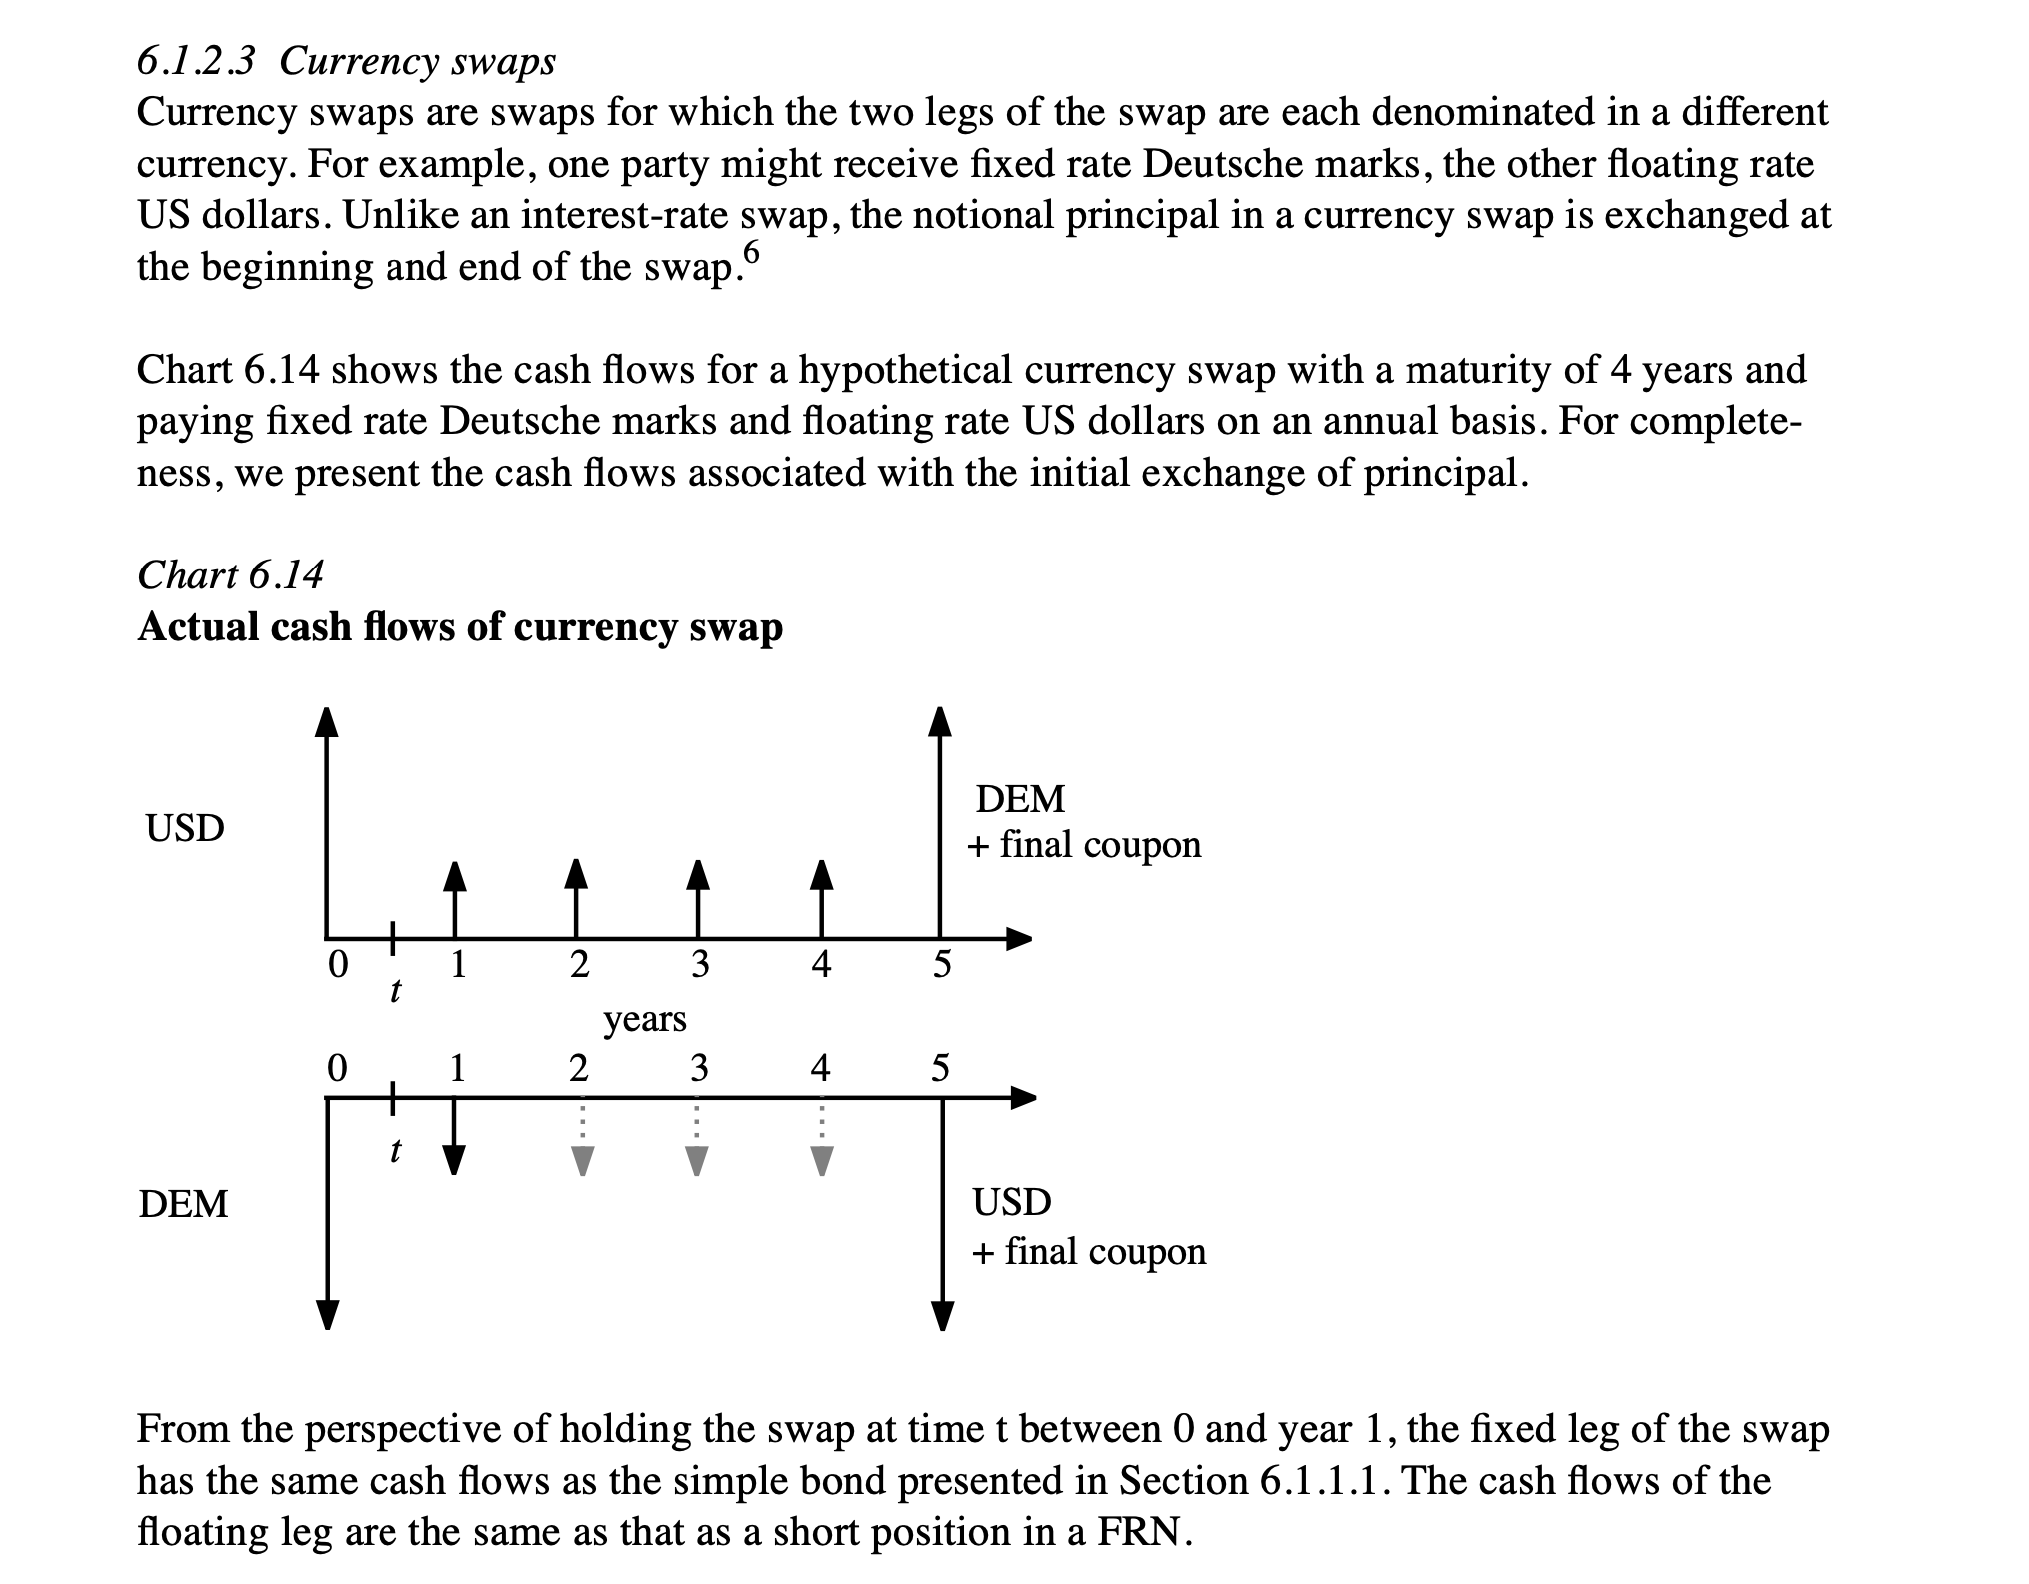

In [23]:
# https://www.msci.com/documents/10199/5915b101-4206-4ba0-aee2-3449d5c7e95a (Page 116)